# Workbook 00 - Solving beams with `PyNite`

In [2]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

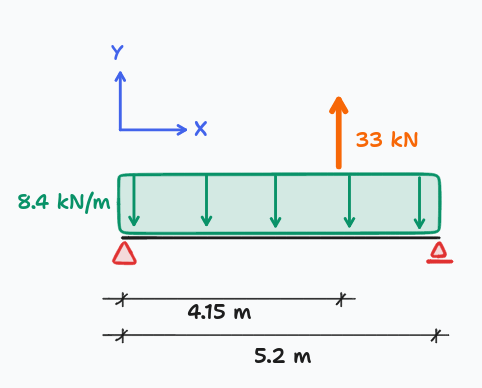

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

+-------------------+
| Analyzing: Linear |
+-------------------+
- Adding nodal spring support stiffness terms to global stiffness matrix
- Adding spring stiffness terms to global stiffness matrix
- Adding member stiffness terms to global stiffness matrix
- Adding quadrilateral stiffness terms to global stiffness matrix
- Adding plate stiffness terms to global stiffness matrix
- Checking nodal stability

- Analyzing load combination LC1
- Calculating global displacement vector

- Analyzing load combination LC2
- Calculating global displacement vector

- Analysis complete

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+-----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  |  Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------

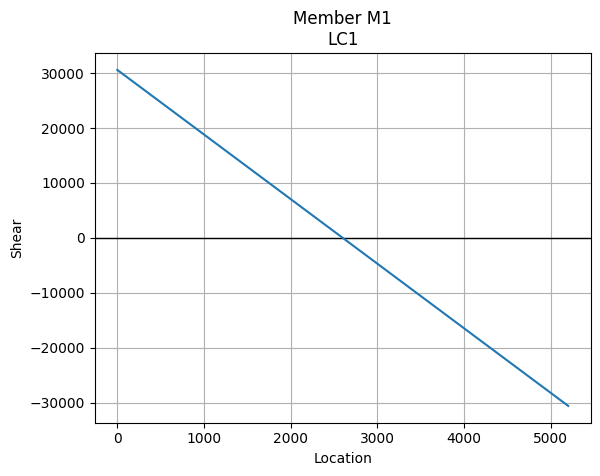

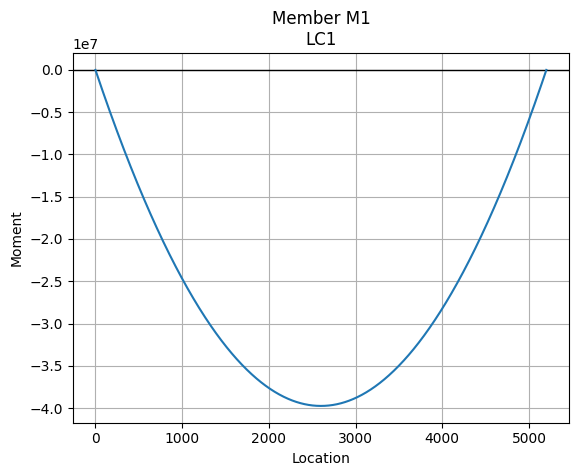

{'LC1': 30576.0, 'LC2': 17304.80769230769}
{'LC1': 30576.0, 'LC2': -12204.807692307691}


In [3]:
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node("node1",0,0,0)
beam_model.add_node("node2",5200,0,0)

beam_model.add_member('M1','node1','node2',23e3, 77e3, 100e6, 800e6, 400e6, 2000)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node2", support_DY=True)

beam_model.add_load_combo("LC1", {"D":1.4})
beam_model.add_load_combo("LC2", {'D':1.25, "L":1.5})

beam_model.add_member_pt_load("M1","Fy",33000,x=4150,case='L')
beam_model.add_member_dist_load("M1","Fy",-8.4,-8.4,0,5200,case='D')

beam_model.analyze_linear(log=True,check_statics=True)

#render_model(beam_model, combo_name='LC2', annotation_size=300)

beam_model.Members['M1'].plot_shear("Fy",combo_name="LC1", n_points=1000)
beam_model.Members['M1'].plot_moment("Mz",combo_name="LC1", n_points=1000)

print(beam_model.Nodes['node1'].RxnFY)
print(beam_model.Nodes['node2'].RxnFY)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

### Diagram of task 02 

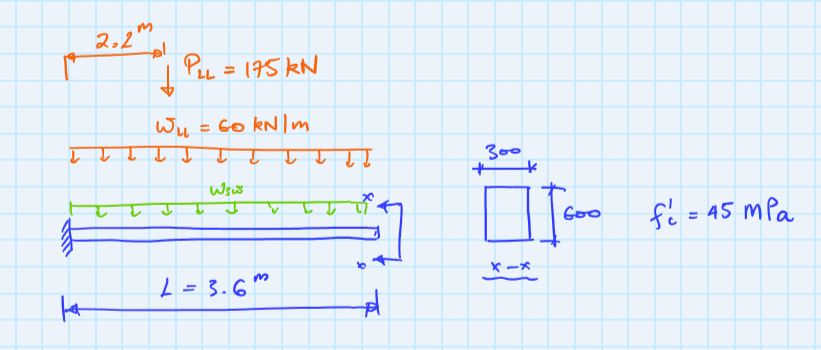

### Section properties

In [21]:
B = 300 # [mm] width of beam 
D = 600 # [mm] depth of beam 

A = B*D # [mm^2] cross sectional area of beam 
I_major = B*D**3/12 # [mm^4] second moment area of beam about major axis  
I_minor = B**3*D/12 # [mm^4] second moment area of beam about minor axis 
J = B*D/12*(B**2+D**2) # [mm^4] polar moment of intertia of beam 

### Material properties

In [48]:
f_c = 45 # [MPa] characteristic strength of concrete 
gamma_concrete = 2400 # [kg] density of concrete 
E_c = gamma_concrete**1.5*0.043*f_c**0.5 # [MPa] approximate Young's modulus of concrete as per AS 5100.5 Cl 3.1.2
v_c = 0.2 # [-] Poisson's ration for concrete
G_c = E_c/(1+v_c) # [MPa] Shear modulus of concrete

### Span properties

In [49]:
L = 3600 # [mm] span 
w_DL = gamma_concrete*10/1000**3*A
w_LL = 60 # [N/mm] live distributed load 
P_LL = 175*1000 # [N] live point load
x_P_LL = 2200 #[mm] location of live point load from LHS support 

### Stepping into FE function

+-------------------+
| Analyzing: Linear |
+-------------------+
- Adding nodal spring support stiffness terms to global stiffness matrix
- Adding spring stiffness terms to global stiffness matrix
- Adding member stiffness terms to global stiffness matrix
- Adding quadrilateral stiffness terms to global stiffness matrix
- Adding plate stiffness terms to global stiffness matrix
- Checking nodal stability

- Analyzing load combination LC1
- Calculating global displacement vector

- Analyzing load combination LC2
- Calculating global displacement vector

- Analysis complete

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+-

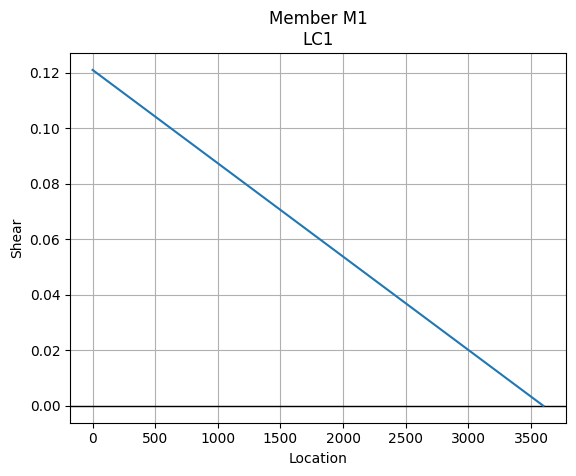

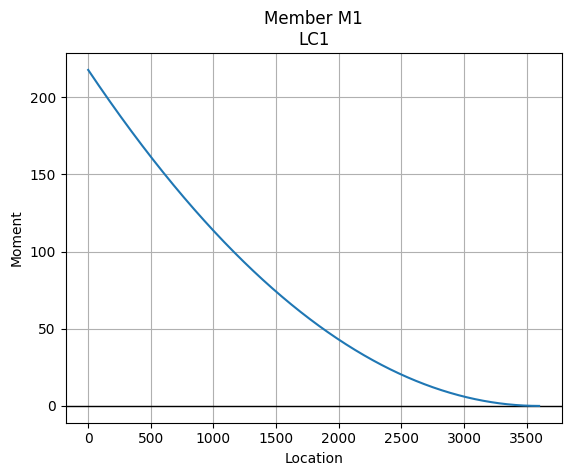

Vertical reactions given as follows:
{'LC1': 0.12096000000000001, 'LC2': 586500.1080000002}
Moment reactions (about major axis) given as follows:
{'LC1': 217.72799999999987, 'LC2': 1160700194.3999996}


In [50]:
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node("node1",0,0,0)
beam_model.add_node("node2",L,0,0)

beam_model.add_member('M1','node1','node2',E_c, G_c, I_minor, I_major, J, A)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=True, support_RZ=True)

beam_model.add_load_combo("LC1", {"D":1.4})
beam_model.add_load_combo("LC2", {'D':1.25, "L":1.5})


beam_model.add_member_dist_load("M1","Fy",-w_DL,-w_DL,0,L,case='D')

beam_model.add_member_dist_load("M1","Fy",-w_LL,-w_LL,0,L,case='L')
beam_model.add_member_pt_load("M1","Fy",-P_LL,x=x_P_LL,case='L')

beam_model.analyze_linear(log=True,check_statics=True)

#render_model(beam_model, combo_name='LC2', annotation_size=300)

beam_model.Members['M1'].plot_shear("Fy",combo_name="LC1", n_points=1000)
beam_model.Members['M1'].plot_moment("Mz",combo_name="LC1", n_points=1000)

print('Vertical reactions given as follows:')
print(beam_model.Nodes['node1'].RxnFY)
print('Moment reactions (about major axis) given as follows:')
print(beam_model.Nodes['node1'].RxnMZ)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

### Diagram of task 03 option B 

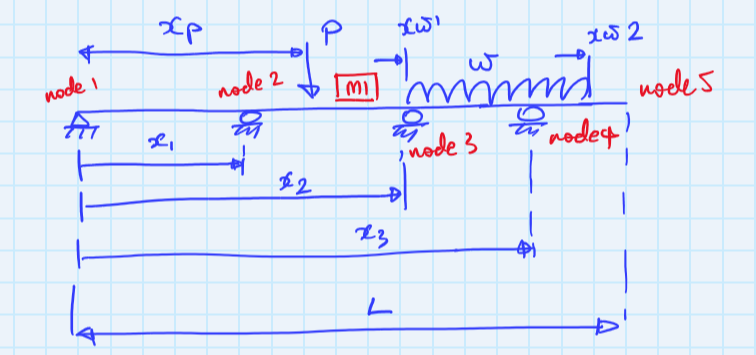

### Span input 

In [57]:
L = 4200 # [mm] span 
x1 = 600 # [mm] location of node 2
x2 = 2400 # [mm] location of node 3
x3 = 3550 # [mm] location of node 4

### Material properties 

In [58]:
E = 200000*6.89476 # [MPa] Young's Modulus 
v = 0.2 # [-] assume 
G = E/(1+v) # [MPa] Shear modulus 

### Section properties 

In [59]:
A = 1 # [mm^2] cross sectional area (assume unit value)
Iy = 1 # [mm^4] second moment of area y-y axis (assume unit value)
Iz = 854e6 # [mm^4] second moment of area about z-z axis 
J = 1 # [mm^4] polar moment of area about z axis (assume unit value)

### Loading 

In [60]:
P = 2500 # [N] point load 
xP = 1200*2.54 # [mm] location of point load 

w = 2.4 # [N/mm] uniformly distributed load 
xw1 = 300 # [mm] start of UDL 
xw2 = 3000 # [mm] end of UDL 

### Stepping into FE function  

+-------------------+
| Analyzing: Linear |
+-------------------+
- Adding nodal spring support stiffness terms to global stiffness matrix
- Adding spring stiffness terms to global stiffness matrix
- Adding member stiffness terms to global stiffness matrix
- Adding quadrilateral stiffness terms to global stiffness matrix
- Adding plate stiffness terms to global stiffness matrix
- Checking nodal stability

- Analyzing load combination LC1
- Calculating global displacement vector

- Analysis complete

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1   

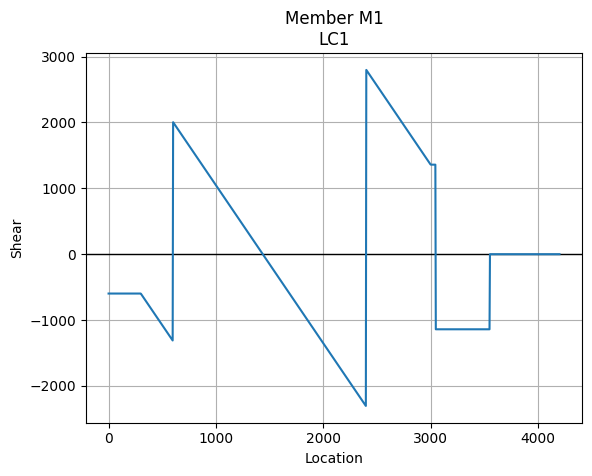

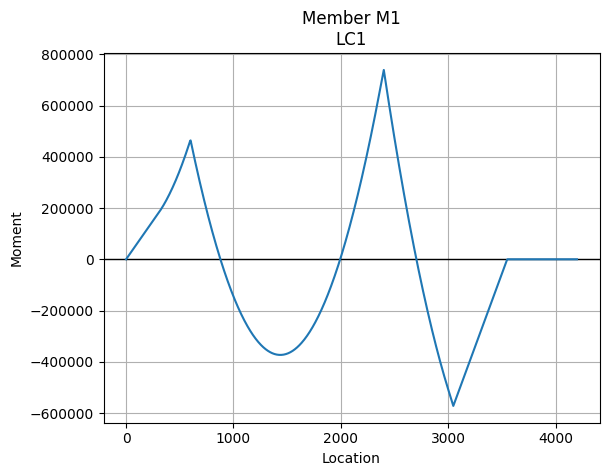

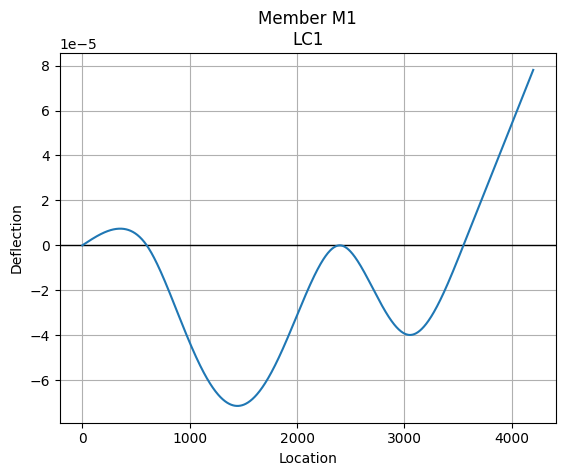

Vertical reactions given as follows:
{'LC1': -597.3080944456}
Moment reactions (about major axis) given as follows:
{'LC1': -7.275957614183426e-11}


In [66]:
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node("node1",0,0,0)
beam_model.add_node("node2",x1,0,0)
beam_model.add_node("node3",x2,0,0)
beam_model.add_node("node4",x3,0,0)
beam_model.add_node("node5",L,0,0)

beam_model.add_member('M1','node1','node5',E, G, Iy, Iz, J, A)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node2", support_DY=True)
beam_model.def_support("node3", support_DY=True)
beam_model.def_support("node4", support_DY=True)

beam_model.add_load_combo("LC1", {"L":1})

beam_model.add_member_pt_load("M1","Fy",-P,x=xP,case='L')

beam_model.add_member_dist_load("M1","Fy",-w,-w,xw1,xw2,case='L')

beam_model.analyze_linear(log=True,check_statics=True)



beam_model.Members['M1'].plot_shear("Fy",combo_name="LC1", n_points=1000)
beam_model.Members['M1'].plot_moment("Mz",combo_name="LC1", n_points=1000)
beam_model.Members['M1'].plot_deflection("dy", combo_name="LC1", n_points=1000)

print('Vertical reactions given as follows:')
print(beam_model.Nodes['node1'].RxnFY)
print('Moment reactions (about major axis) given as follows:')
print(beam_model.Nodes['node1'].RxnMZ)

render_model(beam_model, combo_name='LC1', annotation_size=100)

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.